In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('2020_al.csv')

In [3]:
data.shape

(337553, 19)

In [4]:
data.head()

,index,stream,Zscore,district_rank,island_rank,al_year,sub1,sub1_r,sub2,sub2_r,sub3,sub3_r,cgt_r,ge_r,syllabus,birth_day,birth_month,birth_year,gender
0,0,ARTS,-.3550,4336 (NEW),64994 (NEW),2020,POLITICAL SCIENCE,S,DANCING(BHARATHA),C,TAMIL,S,056,S,new,31,May,2001,female
1,1,ARTS,-.2648,4154 (NEW),62338 (NEW),2020,POLITICAL SCIENCE,S,CARNATIC MUSIC,C,TAMIL,C,032,C,new,13,January,2002,female
2,2,COMMERCE,-.4760,6910 (NEW),37307 (NEW),2020,ECONOMICS,S,BUSINESS STUDIES,S,ACCOUNTING,S,050,S,new,16,August,2001,female
3,3,COMMERCE,-.1012,5678 (NEW),30449 (NEW),2020,ECONOMICS,C,BUSINESS STUDIES,C,ACCOUNTING,S,034,S,new,16,August,2001,female
4,4,COMMERCE,.6014,3269 (NEW),17010 (NEW),2020,ECONOMICS,C,BUSINESS STUDIES,C,ACCOUNTING,B,036,S,new,7,August,2000,female


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337553 entries, 0 to 337552
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   index          337553 non-null  int64 
 1   stream         337553 non-null  object
 2   Zscore         337553 non-null  object
 3   district_rank  337553 non-null  object
 4   island_rank    337553 non-null  object
 5   al_year        337553 non-null  int64 
 6   sub1           337553 non-null  object
 7   sub1_r         337553 non-null  object
 8   sub2           337553 non-null  object
 9   sub2_r         337553 non-null  object
 10  sub3           337553 non-null  object
 11  sub3_r         337553 non-null  object
 12  cgt_r          337553 non-null  object
 13  ge_r           337553 non-null  object
 14  syllabus       337553 non-null  object
 15  birth_day      337553 non-null  object
 16  birth_month    337553 non-null  object
 17  birth_year     337553 non-null  object
 18  gend

In [6]:
data.isnull().sum()

index               0
stream              0
Zscore              0
district_rank       0
island_rank         0
al_year             0
sub1                0
sub1_r              0
sub2                0
sub2_r              0
sub3                0
sub3_r              0
cgt_r               0
ge_r                0
syllabus            0
birth_day           0
birth_month         0
birth_year          0
gender           1484
dtype: int64

In [7]:
data['gender'].fillna('Unknown', inplace = True)

C:\Users\DSYS\AppData\Local\Temp\ipykernel_9992\2358842940.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['gender'].fillna('Unknown', inplace = True)


In [8]:
data.isnull().sum()

index            0
stream           0
Zscore           0
district_rank    0
island_rank      0
al_year          0
sub1             0
sub1_r           0
sub2             0
sub2_r           0
sub3             0
sub3_r           0
cgt_r            0
ge_r             0
syllabus         0
birth_day        0
birth_month      0
birth_year       0
gender           0
dtype: int64

In [9]:
data['gender'].unique()

array(['female', 'male', 'Unknown', 'Major error'], dtype=object)

In [10]:
data = data.drop(columns = ['index', 'al_year', 'birth_day', 'birth_year', 'birth_month', 'district_rank', 'island_rank', 'cgt_r', 'ge_r'])

In [11]:
data.head()

,stream,Zscore,sub1,sub1_r,sub2,sub2_r,sub3,sub3_r,syllabus,gender
0,ARTS,-.3550,POLITICAL SCIENCE,S,DANCING(BHARATHA),C,TAMIL,S,new,female
1,ARTS,-.2648,POLITICAL SCIENCE,S,CARNATIC MUSIC,C,TAMIL,C,new,female
2,COMMERCE,-.4760,ECONOMICS,S,BUSINESS STUDIES,S,ACCOUNTING,S,new,female
3,COMMERCE,-.1012,ECONOMICS,C,BUSINESS STUDIES,C,ACCOUNTING,S,new,female
4,COMMERCE,.6014,ECONOMICS,C,BUSINESS STUDIES,C,ACCOUNTING,B,new,female


In [12]:
# convert string data
cols = ['stream', 'sub1', 'sub1_r', 'sub2', 'sub2_r', 'sub3', 'sub3_r', 'syllabus', 'gender']
labelEncoders = {col: LabelEncoder() for col in cols}

for col in cols:
    data[col] = labelEncoders[col].fit_transform(data[col])

In [13]:
data.head()

,stream,Zscore,sub1,sub1_r,sub2,sub2_r,sub3,sub3_r,syllabus,gender
0,1,-.3550,47,5,20,3,58,6,0,2
1,1,-.2648,47,5,12,3,58,4,0,2
2,4,-.4760,21,5,11,5,0,6,0,2
3,4,-.1012,21,3,11,3,0,6,0,2
4,4,.6014,21,3,11,3,0,3,0,2


In [14]:
data['Zscore'] = pd.to_numeric(data['Zscore'], errors='coerce')

In [15]:
data.isnull().sum()

stream           0
Zscore      105249
sub1             0
sub1_r           0
sub2             0
sub2_r           0
sub3             0
sub3_r           0
syllabus         0
gender           0
dtype: int64

# Analysis

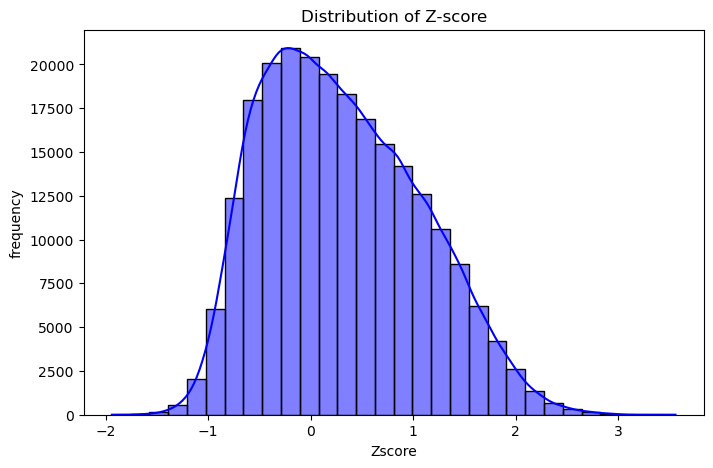

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(data['Zscore'], kde=True, bins=30, color='blue')
plt.title('Distribution of Z-score')
plt.xlabel('Zscore')
plt.ylabel('frequency')
plt.show()

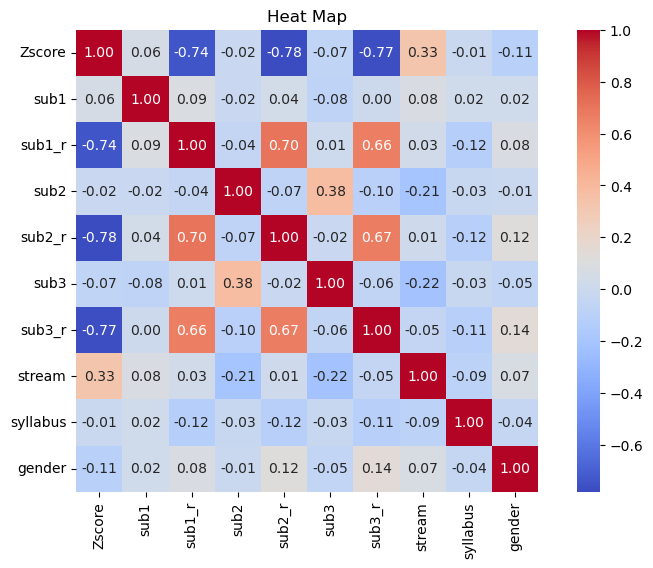

In [17]:
plt.figure(figsize=(10,6))

m_data = data[['Zscore', 'sub1', 'sub1_r', 'sub2', 'sub2_r', 'sub3', 'sub3_r', 'stream', 'syllabus', 'gender']]

sns.heatmap(m_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Heat Map")
plt.show()

C:\Users\DSYS\AppData\Local\Temp\ipykernel_9992\2821833519.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stream', data=data, palette='viridis', order=data['stream'].value_counts().index)


<Axes: xlabel='stream', ylabel='count'>

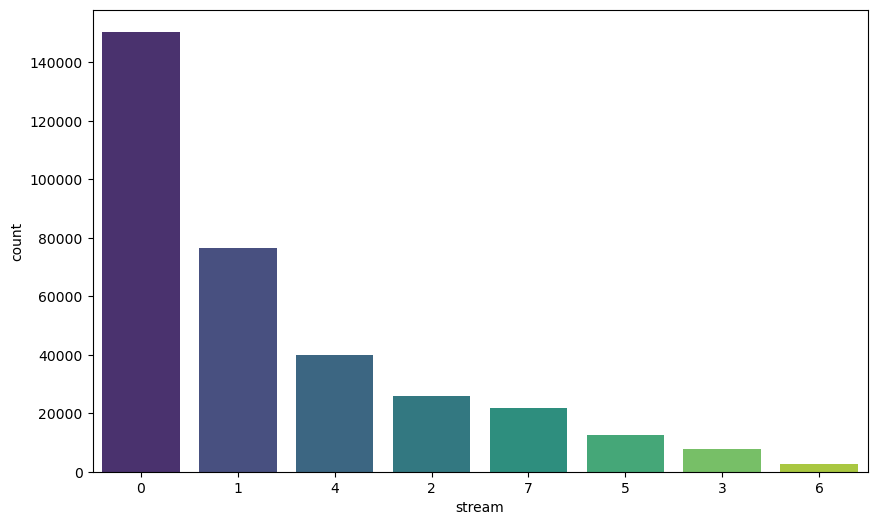

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='stream', data=data, palette='viridis', order=data['stream'].value_counts().index)

In [19]:
# fill null valued Zscores with men value
data['Zscore'].fillna(data['Zscore'].mean(), inplace=True)

C:\Users\DSYS\AppData\Local\Temp\ipykernel_9992\1373886425.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Zscore'].fillna(data['Zscore'].mean(), inplace=True)


In [20]:
X = data.drop(columns=['Zscore'])
y = data['Zscore']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train.shape

(270042, 9)

In [23]:
y_train.shape

(270042,)

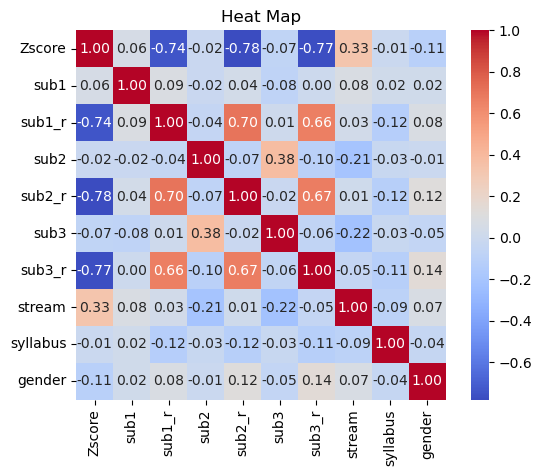

In [24]:
sns.heatmap(m_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Heat Map")
plt.show()

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)
y_pred

array([-0.12508966,  0.88073036, -0.22492262, ...,  0.63137102,
        1.12774821,  0.19331157], shape=(67511,))

In [27]:
score = model.score(X_test, y_test)
score

0.6068556636717202

In [28]:
# another method to see the score
r2_score(y_test, y_pred)

0.6068556636717202

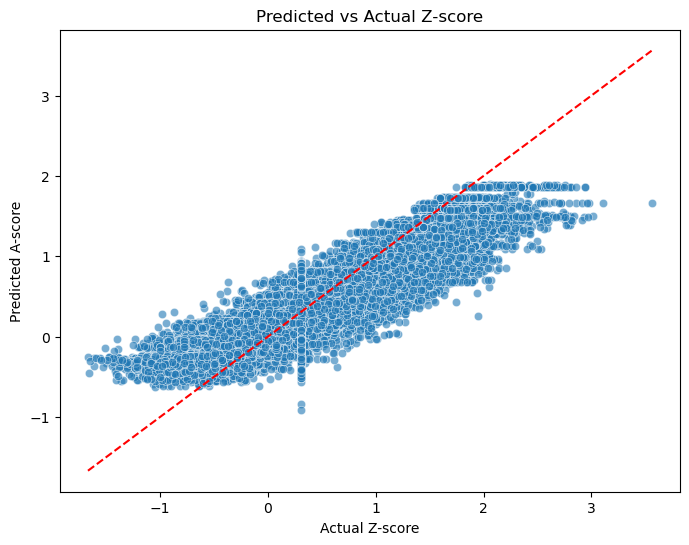

In [29]:
# visualize predections vs actual
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Predicted vs Actual Z-score')
plt.xlabel('Actual Z-score')
plt.ylabel('Predicted A-score')
plt.show()

# Normalization

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
model2 = LinearRegression()
model2.fit(X_train_scaled, y_train)

LinearRegression()

In [33]:
y_pred2 = model2.predict(X_test_scaled)

In [34]:
r2_score(y_test, y_pred2)

0.6068556636717203